# **Επεξεργασία Μονόχρωμης εικόνας**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow #this is used for imshow to work on google colab
from google.colab import drive
import sys
import os


In [2]:
drive.mount('/content/gdrive')
lib_file_location = "/content/gdrive/My Drive/Courses/TEL 750 - Digital Image Processing"
sys.path.append(lib_file_location)

Mounted at /content/gdrive


In [12]:
# Read / Show an image
img_file = '/content/gdrive/My Drive/Courses/TEL 750 - Digital Image Processing/coins.jpg'
image = cv2.imread(img_file) # this image is in BGR format

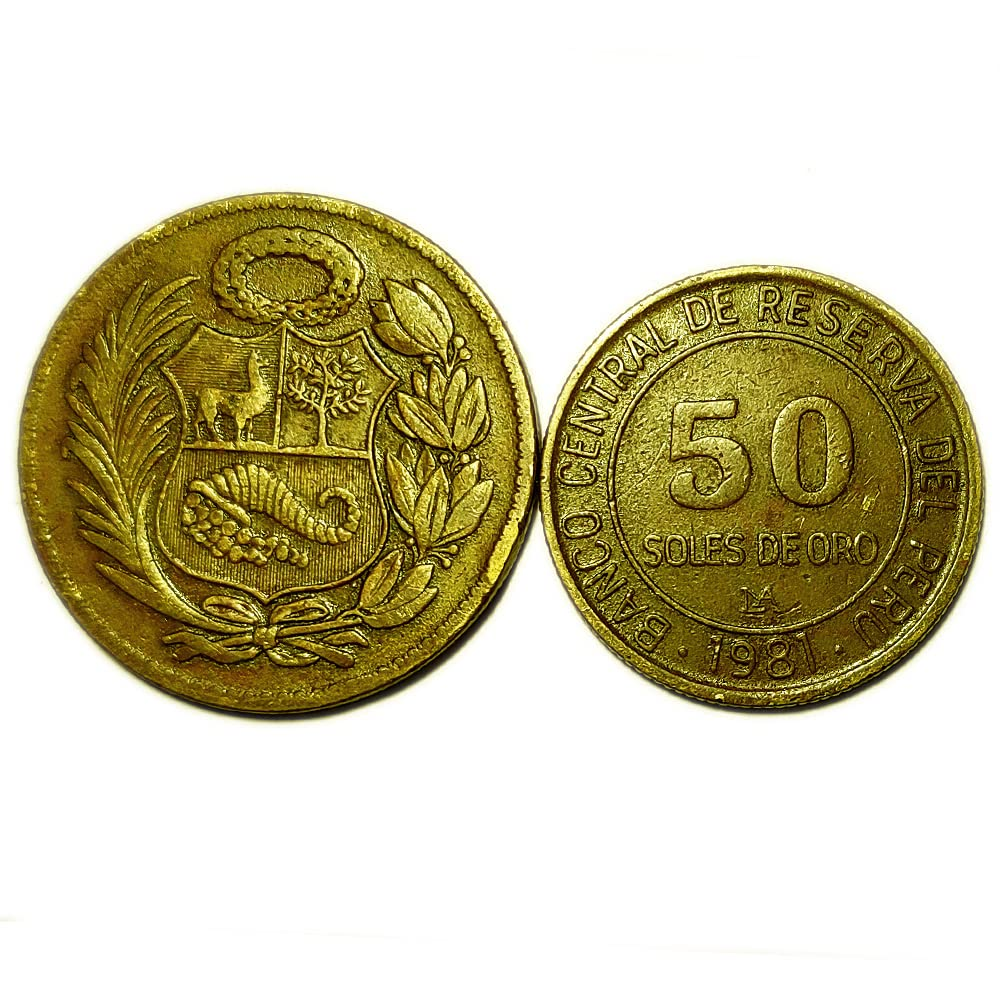

In [13]:
cv2_imshow(image)

# **Μετατροπή εικόνας σε μονόχρωμη**

Για να μπορέσουμε να μετατρέψουμε μια εικόνα σε μονόχρωμη, θα πρέπει αρχικά να την μετατρέψουμε σε grayscale και μετά με τη μέθοδο της κατωφλίωσης μπορούμε να την κάνουμε δυαδική (binary).

Για να το καταφέρουμε αυτό μπορούμε να χρησιμοποιήσουμε δύο διαφορετικούς τρόπους:


1.   γνωρίζουμε το κατώφλι (threshold) που θέλουμε να χρησιμοποιήσουμε
2.   προχωράμε με αυτόματη επιλογή του κατωφλίου σύμφωνα με την μέθοδο του Otsu [1]

[1] [Otsu thresholding with OpenCV](https://learnopencv.com/otsu-thresholding-with-opencv/)

In [19]:
im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# this can be used when the threshold is known
thresh = 240
im_bw_thres = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]

# Otsu method for thresholding
(thresh_otsu, im_bw_otsu) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("Η τιμή του κατωφλίου που υπολογίστηκε από τον αλγόριθμο Otsu είναι: ",thresh_otsu)



Η τιμή του κατωφλίου που υπολογίστηκε από τον αλγόριθμο Otsu είναι:  170.0


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
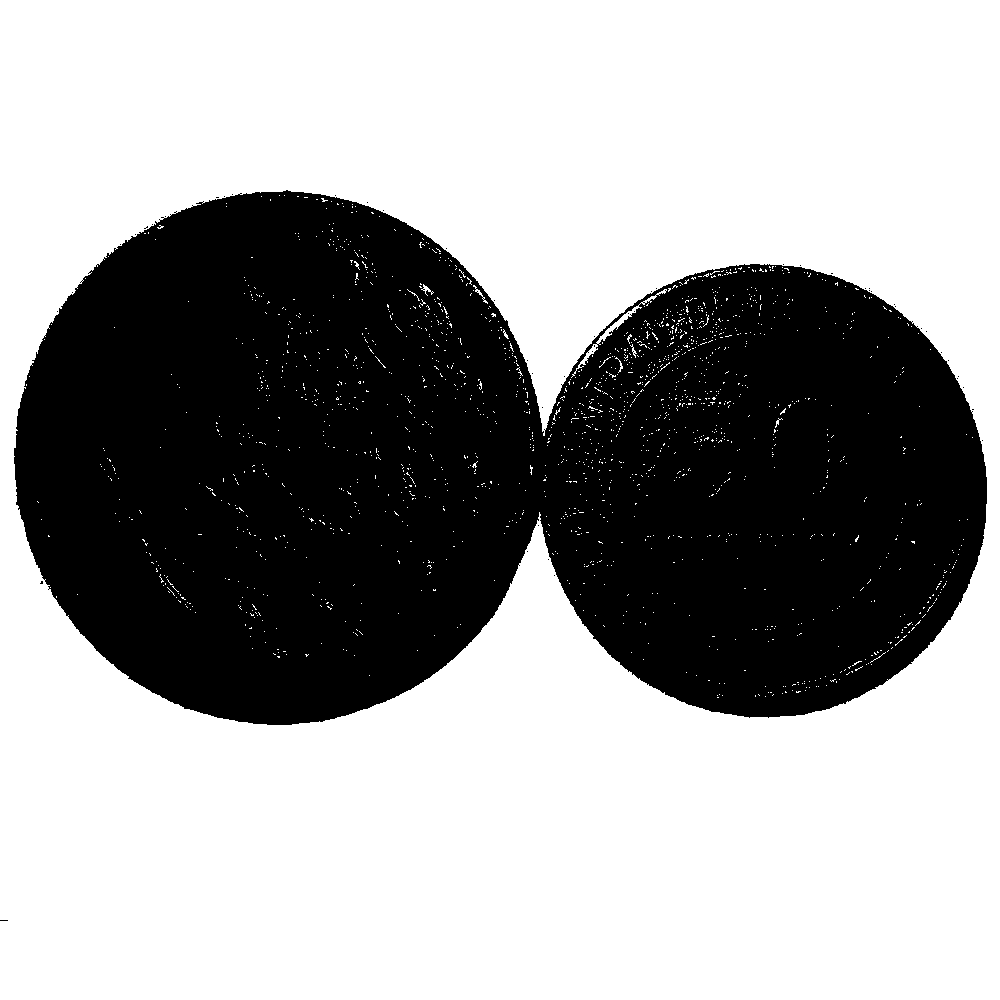

In [20]:
im_bw_thres

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
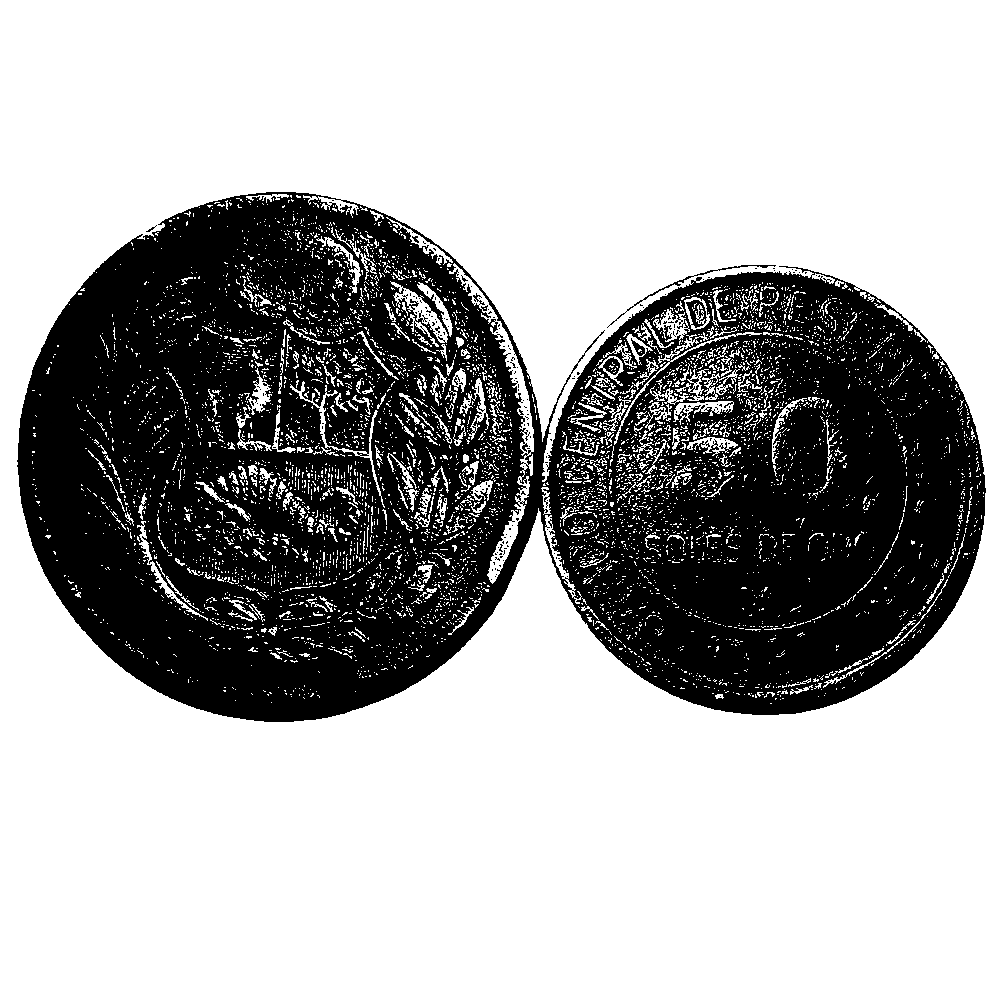

In [15]:
im_bw_otsu

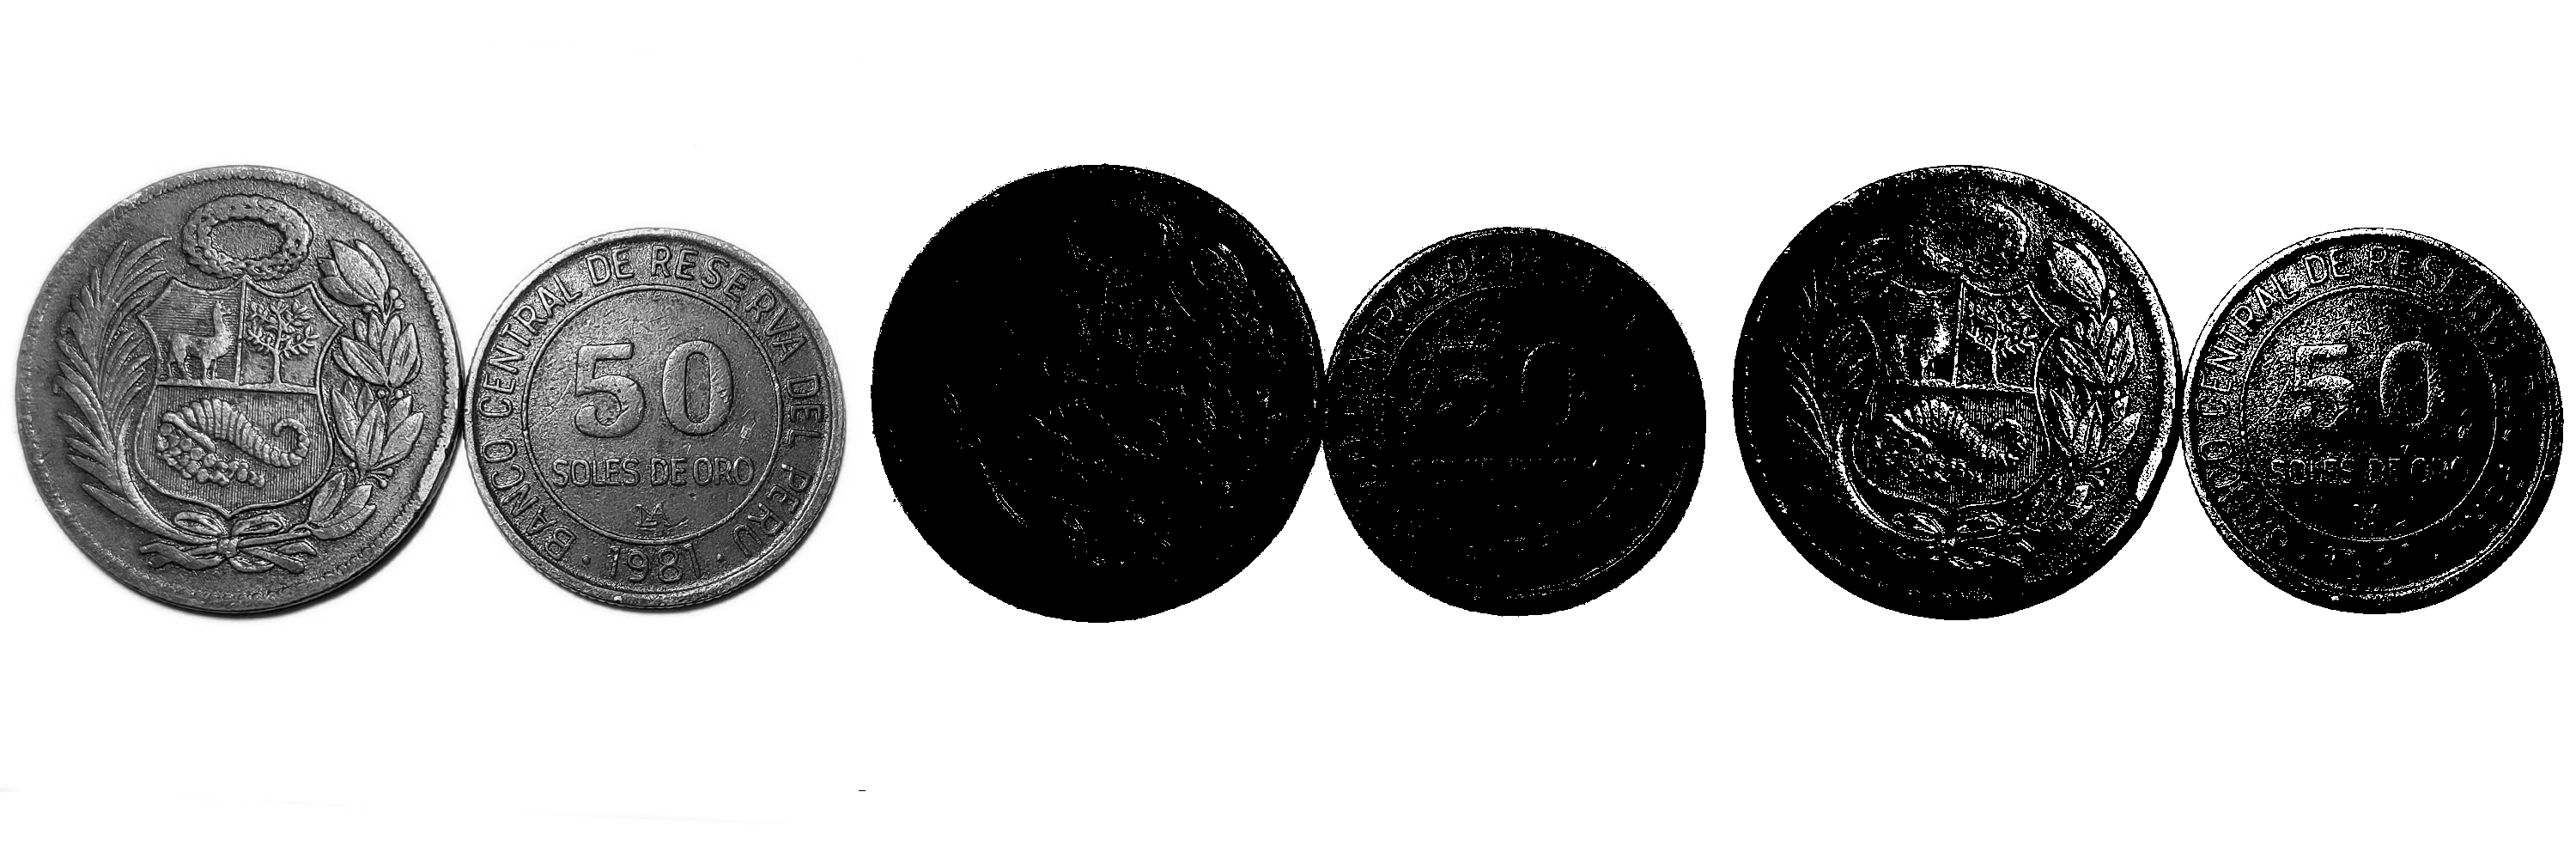

In [21]:
res = np.hstack((im_gray, im_bw_thres, im_bw_otsu)) #stack images horizontally
cv2_imshow(res)


Στις παραπάνω εικόνες, οι φωτεινότητες είναι 0 ή 255. Για τον λόγο αυτό, τις μετατρέπουμε σε δυαδικές, με φωτεινότητες 0 (αντικείμενο) και 1 (φόντο)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
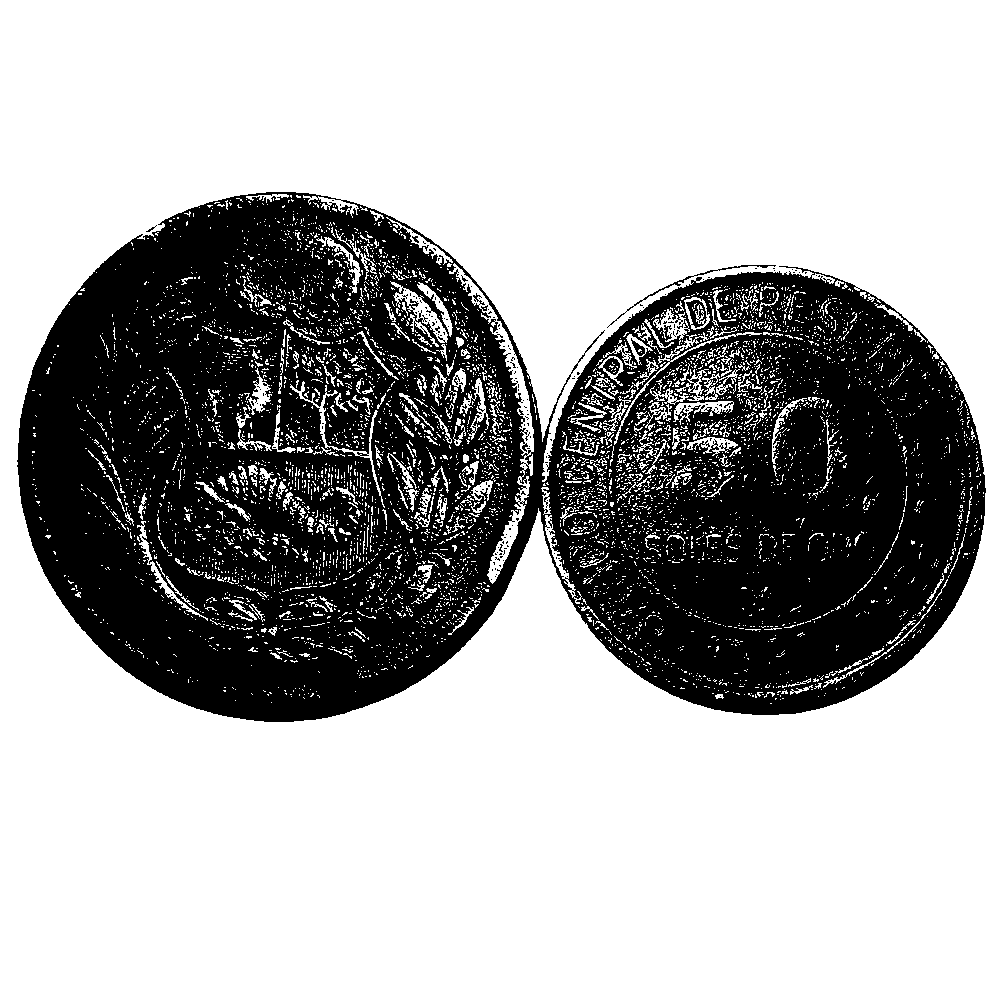

In [22]:
im_bw_otsu

In [23]:
im_bw = im_bw_otsu.copy()
im_bw[im_bw == 0] = 1 # αντικειμενο μου
im_bw[im_bw == 255] = 0 # φόντο εικόνας

In [25]:
rows, cols = np.shape(im_bw_otsu)
print("Ο αριθμός των γραμμών της εικόνας είναι: ",rows)
print("Ο αριθμός των στηλών της εικόνας είναι: ",cols)


Ο αριθμός των γραμμών της εικόνας είναι:  1000
Ο αριθμός των στηλών της εικόνας είναι:  1000


# Υπολογισμός οριζόντιας και κατακόρυφης προβολής εικόνας

In [26]:
horizontal_projection = np.sum(im_bw, axis=1);
vertical_projection = np.sum(im_bw, axis=0);
print("Υπολογίσαμε το άθροισμα των εικονοστοιχείων σε κάθε γραμμή από τις ",horizontal_projection.shape[0])
print("Υπολογίσαμε το άθροισμα των εικονοστοιχείων σε κάθε στήλη από τις ",vertical_projection.shape[0])



Υπολογίσαμε το άθροισμα των εικονοστοιχείων σε κάθε γραμμή από τις  1000
Υπολογίσαμε το άθροισμα των εικονοστοιχείων σε κάθε στήλη από τις  1000


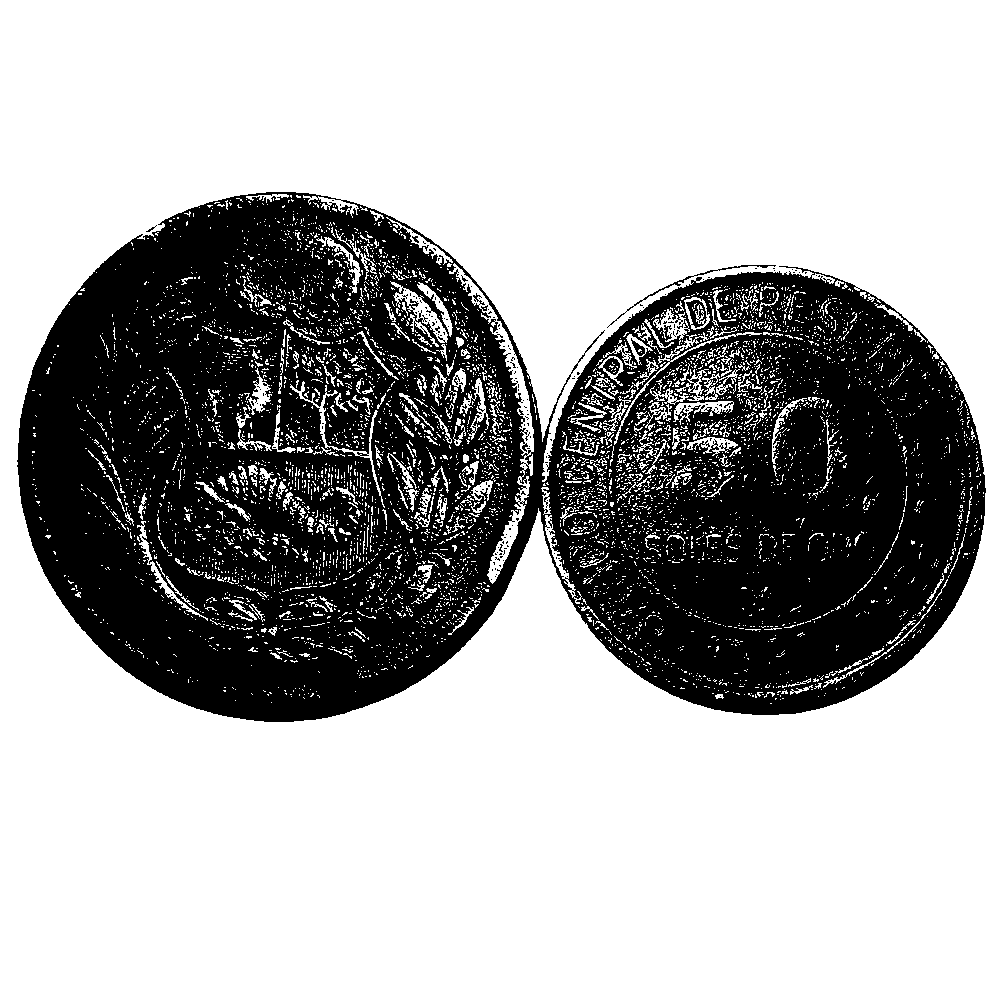

In [27]:
cv2_imshow(im_bw_otsu)

In [28]:
height, width = im_bw.shape # image shape

#Horizontal Projection
m = np.max(horizontal_projection)
h_proj = np.zeros((horizontal_projection.shape[0],width), np.uint8)
# Draw a line for each row
for row in range(height):
   cv2.line(h_proj, (0,row), (int(horizontal_projection[row]*width/m),row), (255,255,255), 1)

#Vertical Projection
m = np.max(vertical_projection)
v_proj = np.zeros((height, vertical_projection.shape[0]), np.uint8)
# Draw a line for each col
for col in range(width):
   cv2.line(v_proj, (col,0), (col, int(vertical_projection[col]*height/m)), (255,255,255), 1)


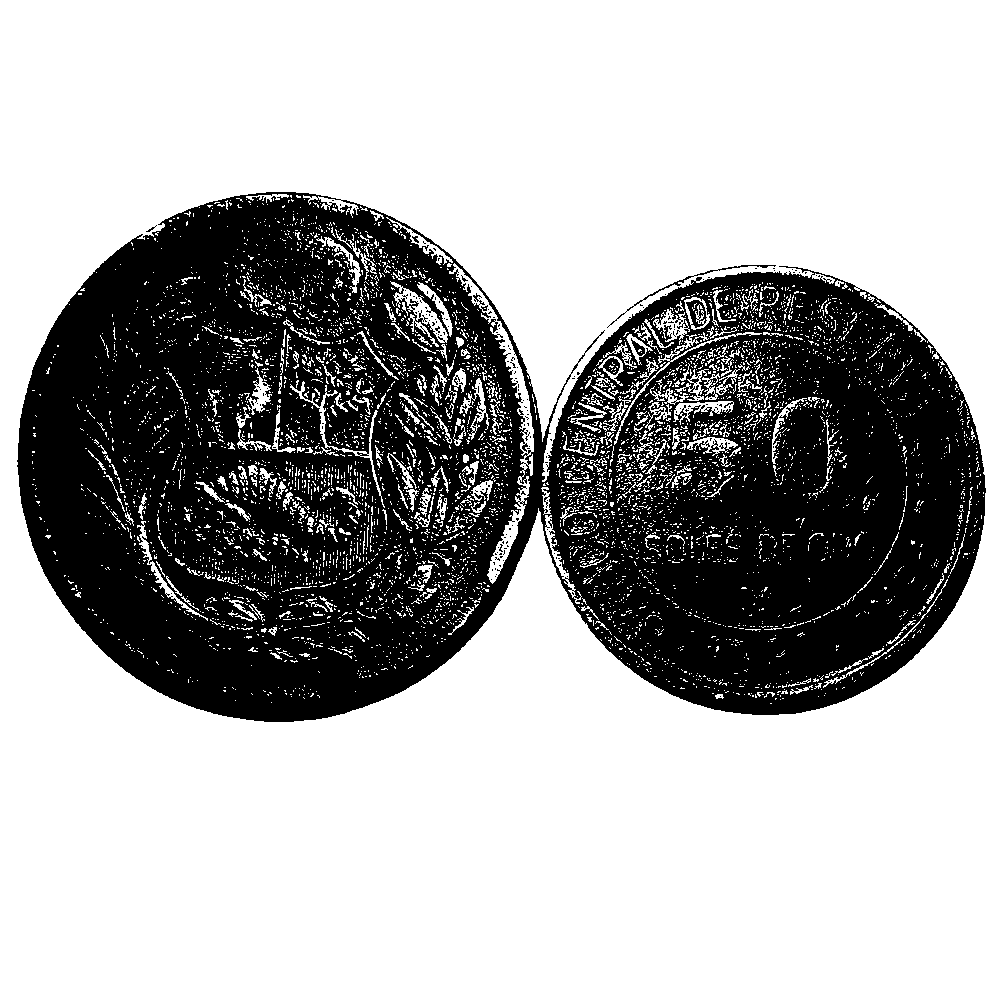

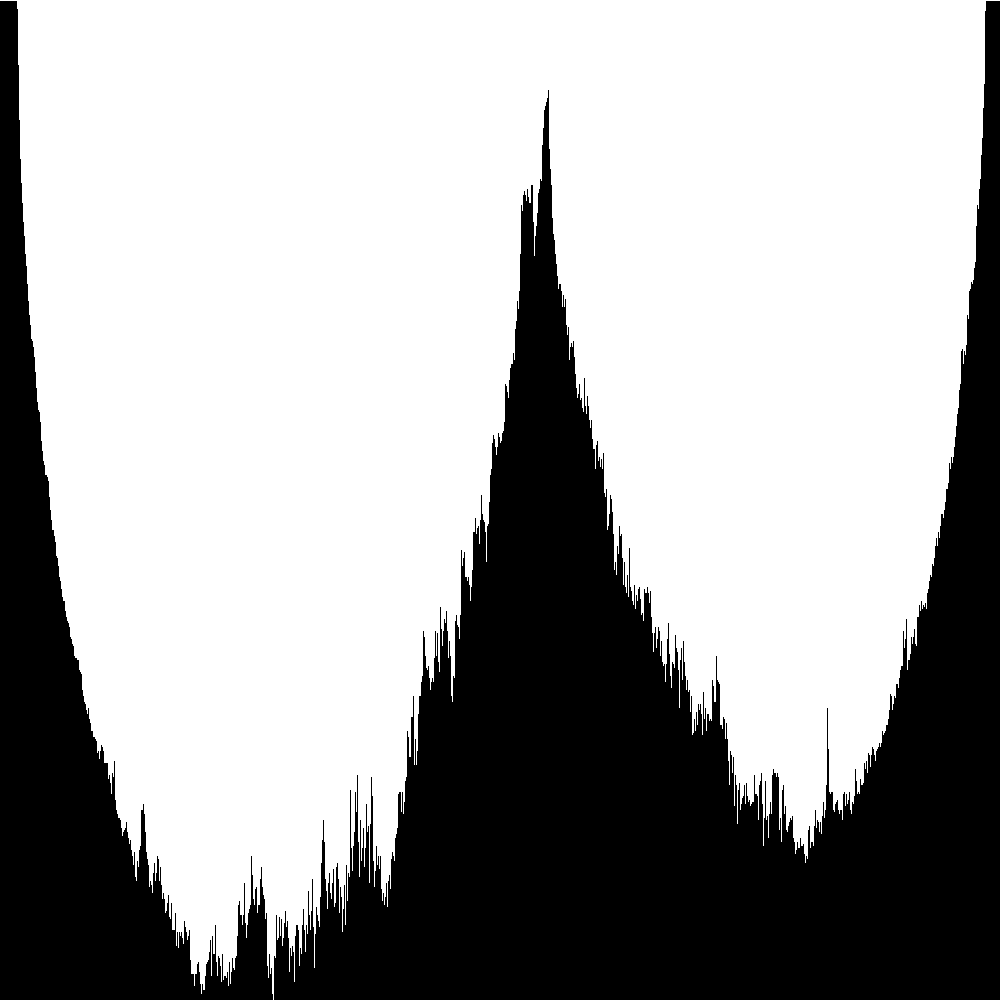

In [30]:
#res = np.hstack((im_bw_otsu, h_proj))
#cv2_imshow(res)
cv2_imshow(im_bw_otsu)
cv2_imshow(v_proj)



# Ο Μετασχηματισμός Radon

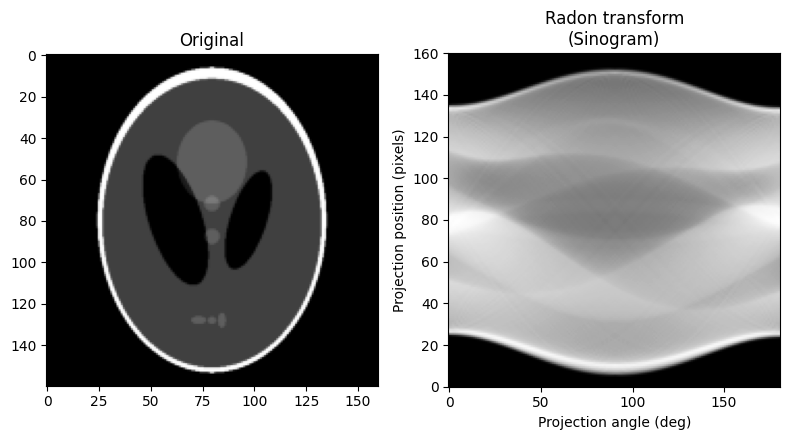

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)
#image = im_gray

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

## Ο αντίστροφος μετασχηματισμός Radon

FBP rms reconstruction error: 0.0283


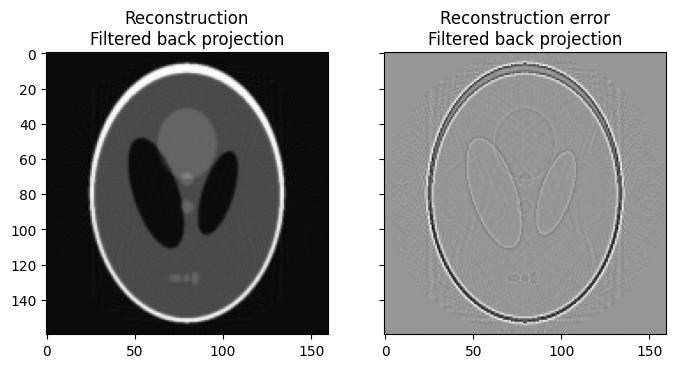

In [32]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
error = reconstruction_fbp - image
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()

# Running Length (RLE) Encoding

In [33]:
def rle_encode(img):
    """
    Run Length Encode a 2D numpy array.
    Returns a list of (value, length) pairs.
    """
    flat_img = img.flatten()
    encoded = []
    count = 1
    current = flat_img[0]

    for pixel in flat_img[1:]:
        if pixel == current:
            count += 1
        else:
            encoded.append((current, count))
            current = pixel
            count = 1

    encoded.append((current, count))  # Don't forget the last run
    return encoded

def rle_decode(encoded, shape):
    """
    Decode RLE data back into a 2D numpy array.
    encoded: List of (value, length) pairs
    shape: Tuple of (height, width) for the original image
    """
    flat = []
    for value, length in encoded:
        flat.extend([value] * length)
    return np.array(flat).reshape(shape)


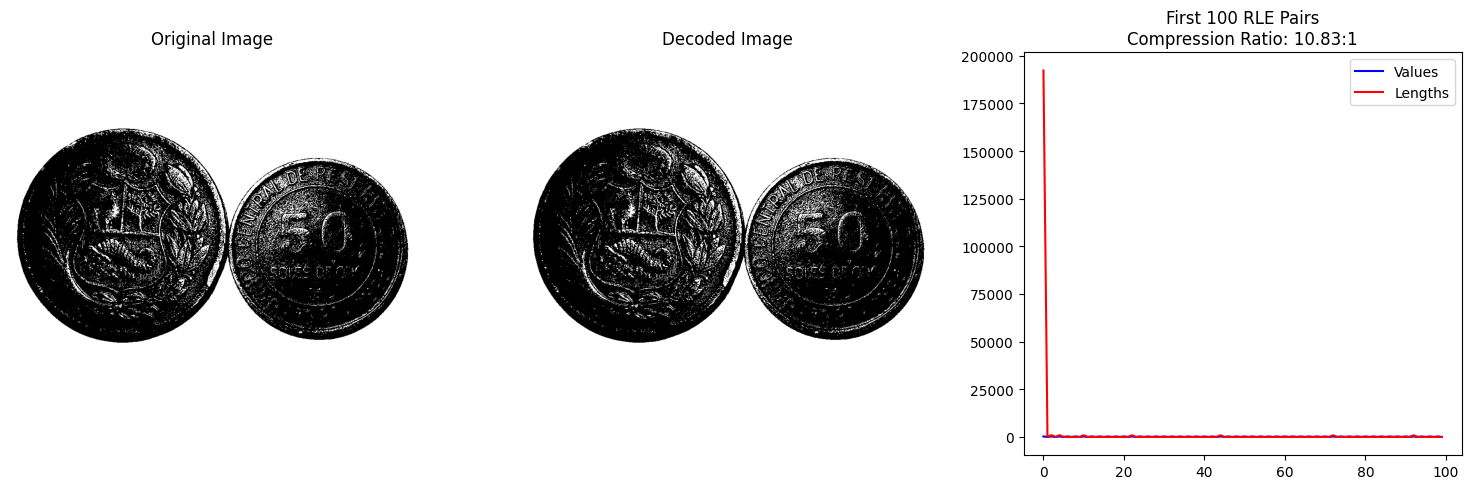

Original image size: 1000000 pixels
Compressed size: 92342 numbers
Compression ratio: 10.83:1
Mean absolute error: 0.00


In [34]:

# Encode and decode
encoded_data = rle_encode(im_bw_otsu)
decoded_array = rle_decode(encoded_data, im_bw_otsu.shape)

# Calculate compression ratio
original_size = im_bw_otsu.size
compressed_size = len(encoded_data) * 2  # Each tuple has 2 numbers
compression_ratio = original_size / compressed_size

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(im_bw_otsu, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(decoded_array, cmap='gray')
plt.title('Decoded Image')
plt.axis('off')

plt.subplot(133)
plt.plot([pair[0] for pair in encoded_data[:100]], 'b-', label='Values')
plt.plot([pair[1] for pair in encoded_data[:100]], 'r-', label='Lengths')
plt.title('First 100 RLE Pairs\nCompression Ratio: {:.2f}:1'.format(compression_ratio))
plt.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Original image size: {original_size} pixels")
print(f"Compressed size: {compressed_size} numbers")
print(f"Compression ratio: {compression_ratio:.2f}:1")
print(f"Mean absolute error: {np.mean(np.abs(im_bw_otsu - decoded_array)):.2f}")

# Morphological Operations on BW Images

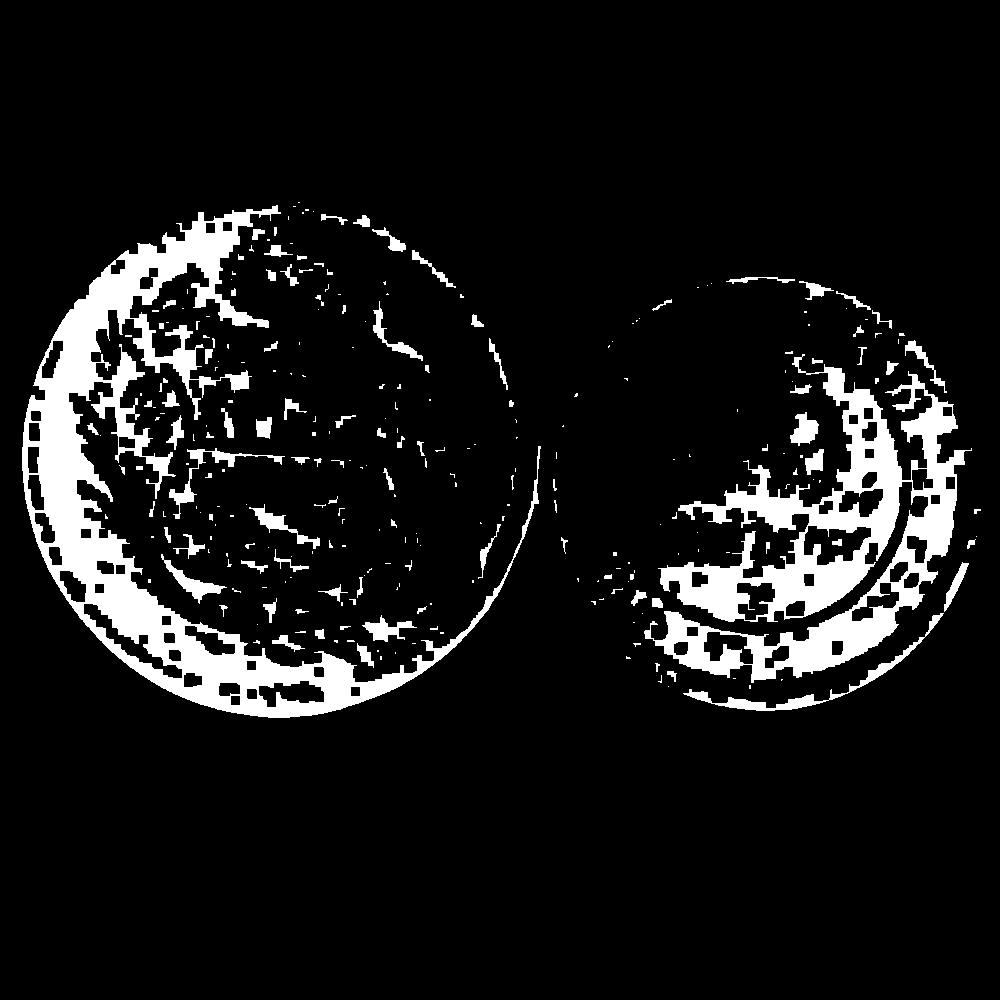

In [42]:
# The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object
# (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution).
# A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).
# So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel.
# So the thickness or size of the foreground object decreases or simply white region decreases in the image.
# It is useful for removing small white noises, detach two connected objects etc.

im_bw_otsu = 255-im_bw_otsu # make the elements white (foreground) and background black

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(im_bw_otsu,kernel,iterations = 2)
cv2_imshow(erosion)

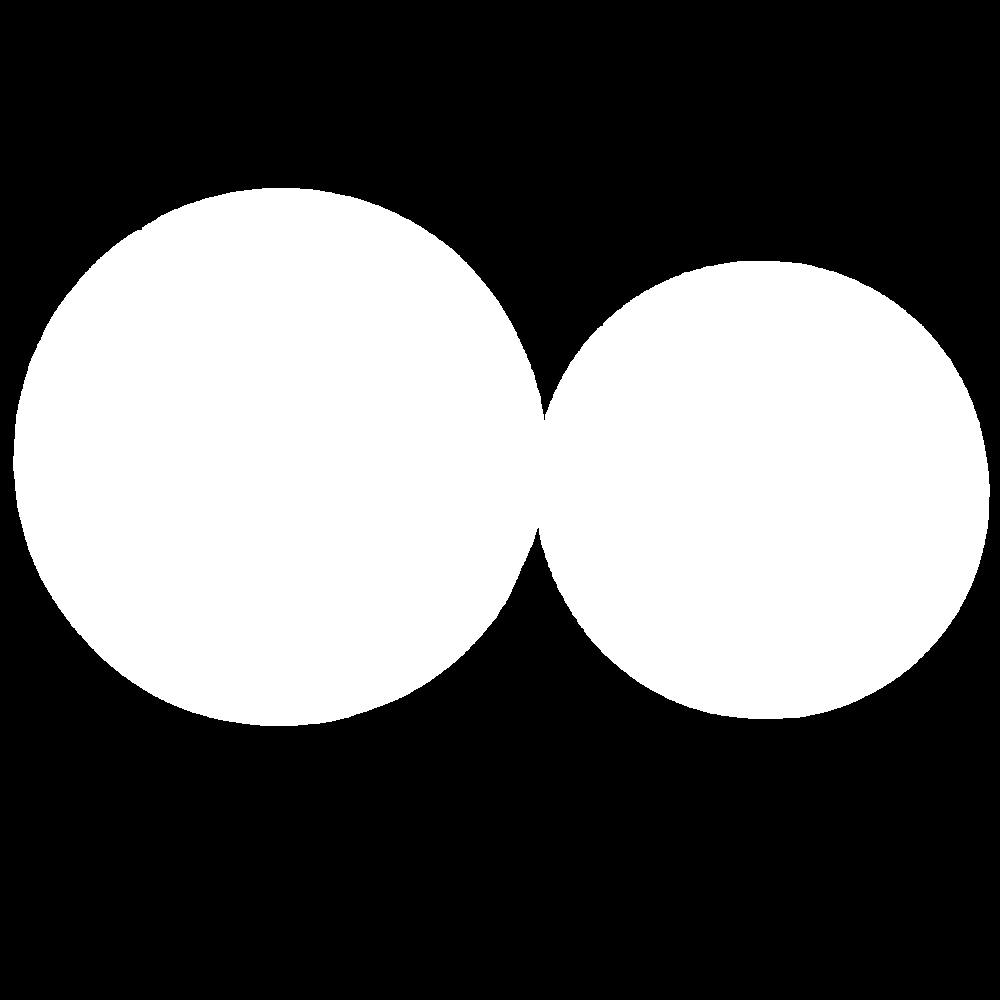

In [43]:
# It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'.
# So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation.
# Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases.
# It is also useful in joining broken parts of an object.

dilation = cv2.dilate(im_bw_otsu,kernel,iterations = 2)
cv2_imshow(dilation)

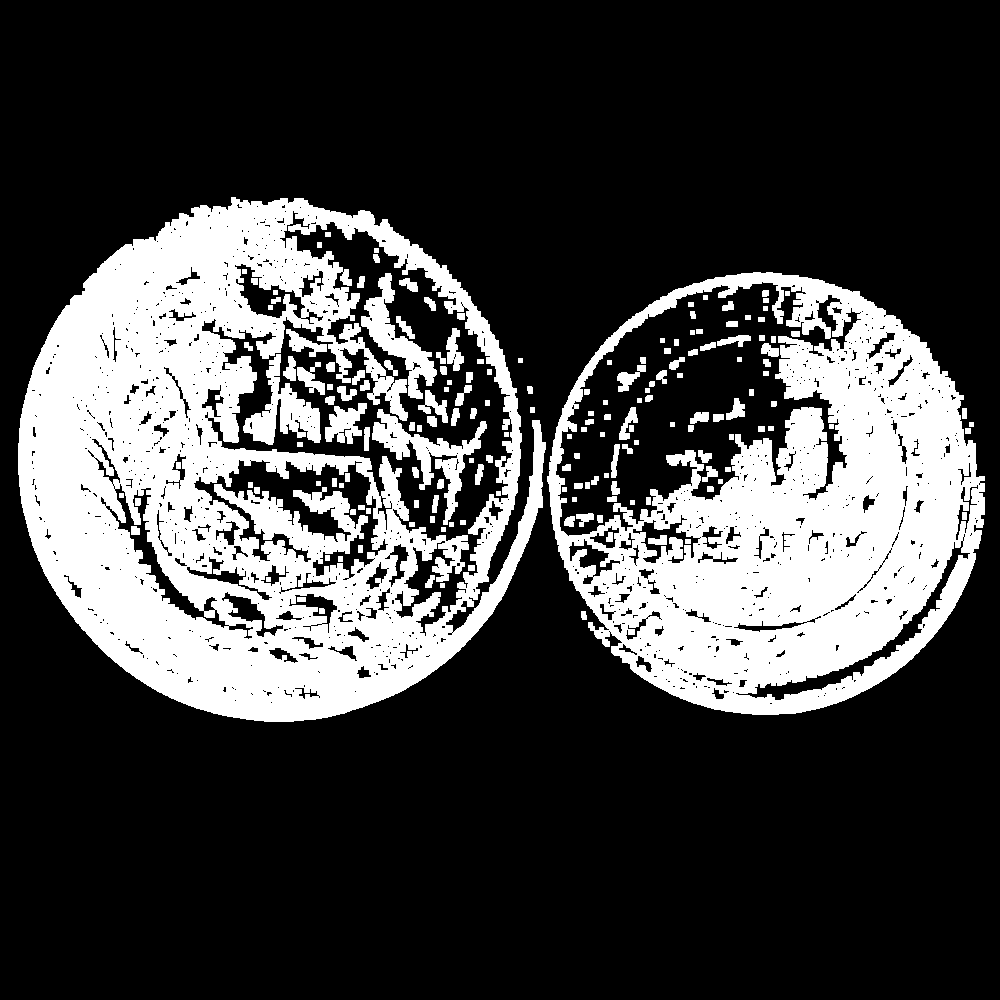

In [44]:
# Opening is just another name of erosion followed by dilation. It is useful in removing noise

opening = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

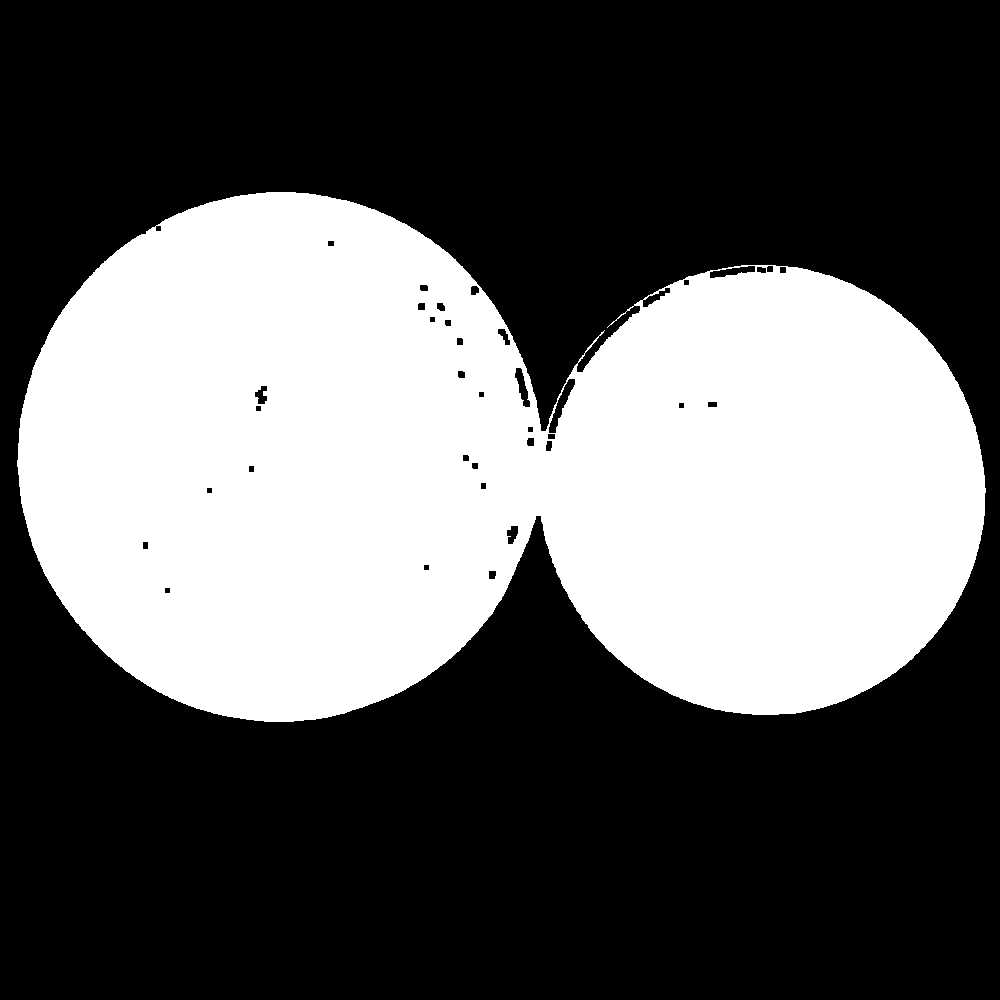

In [45]:
# Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)

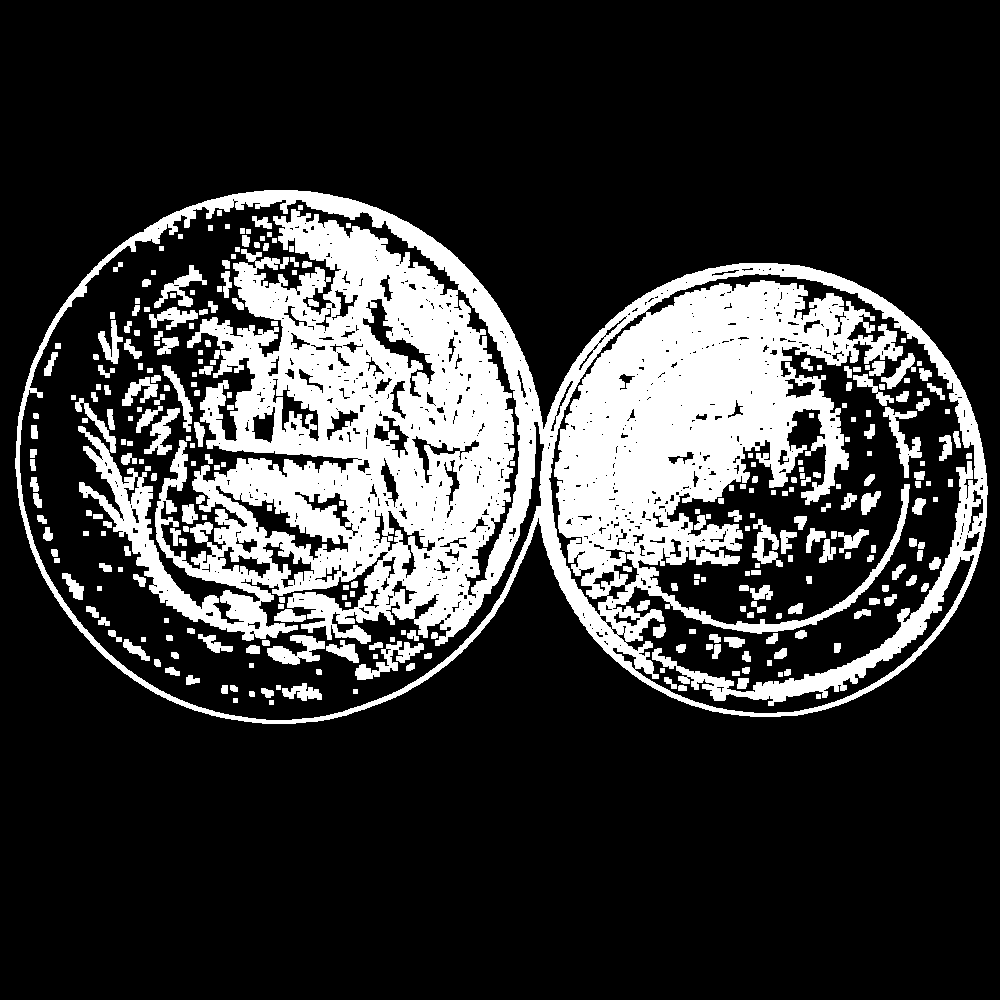

In [46]:
#It is the difference between dilation and erosion of an image. The result will look like the outline of the object.

grad = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(grad)

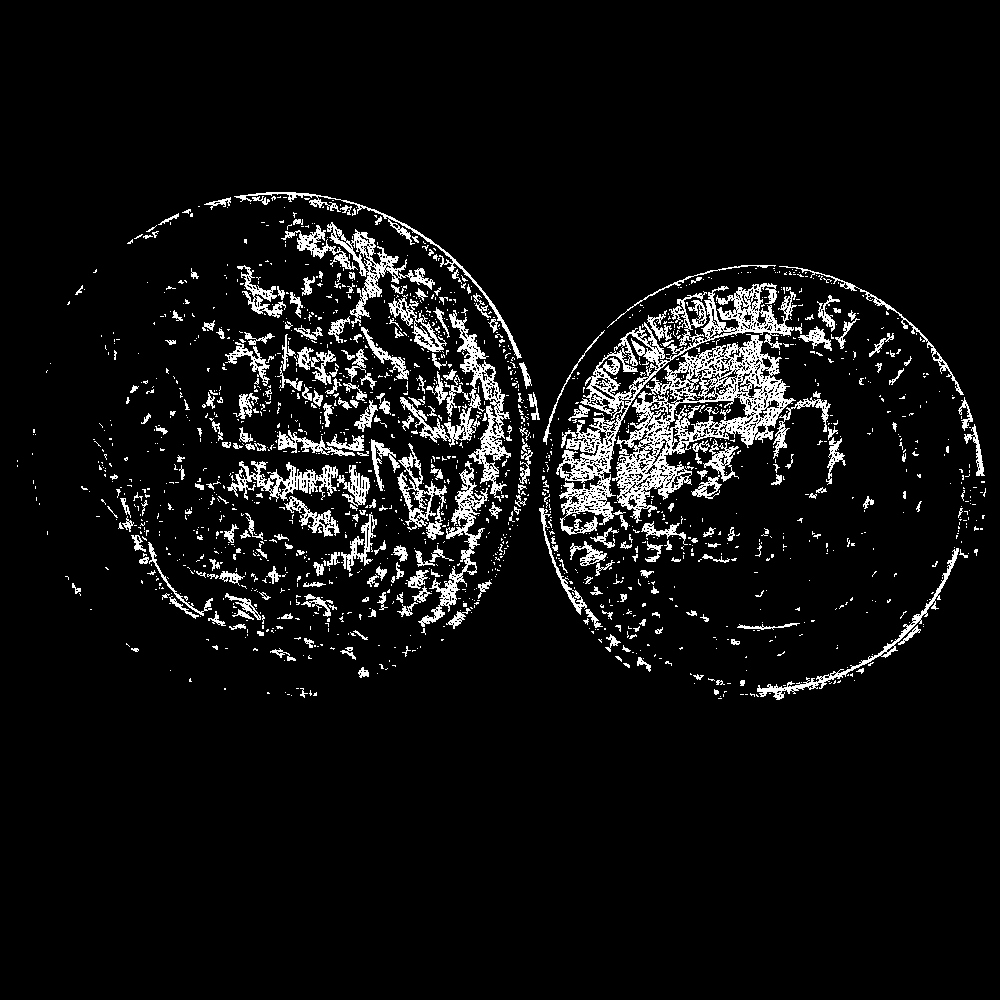

In [47]:
# It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

tophat = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_TOPHAT, kernel)
cv2_imshow(tophat)

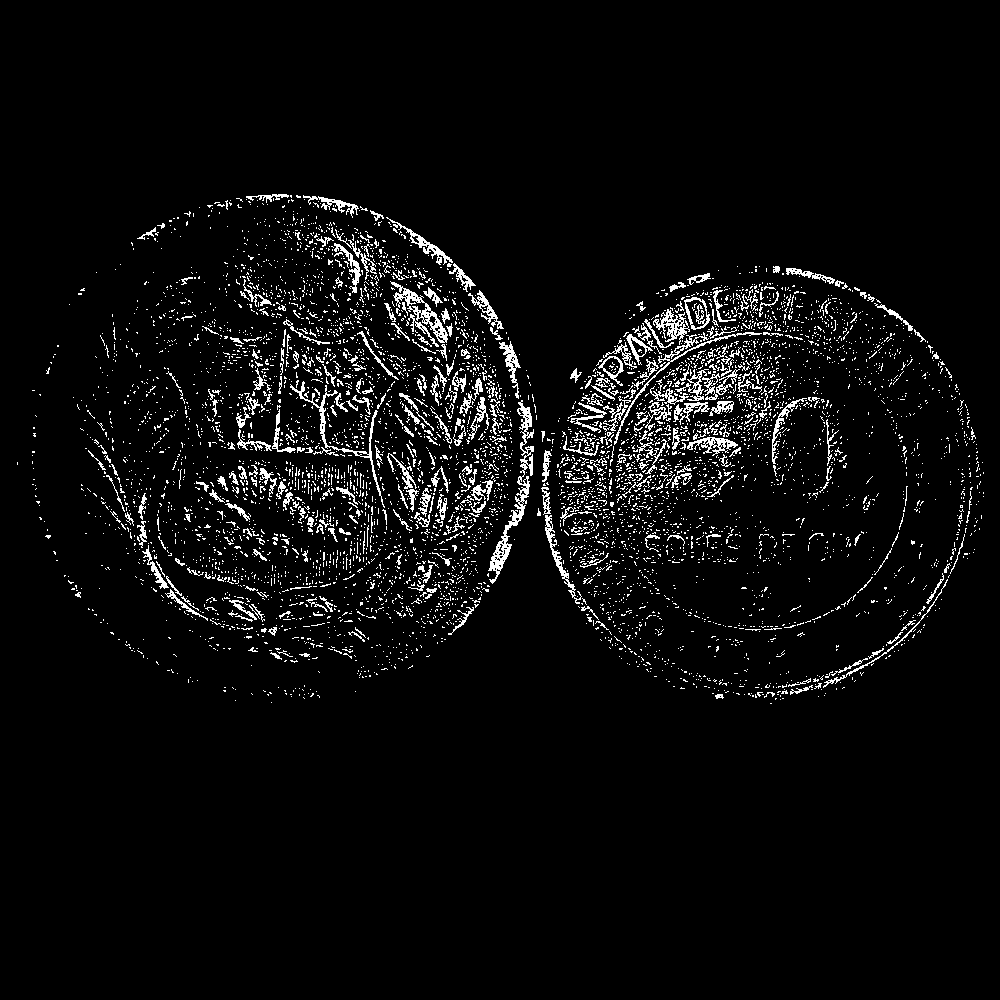

In [48]:
# It is the difference between the closing of the input image and input image.

blackhat = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_BLACKHAT, kernel)
cv2_imshow(blackhat)

# Συνδετικότητα αντικειμένων σε εικόνες

Για τον υπολογισμό χαρακτηριστικών αντικειμένων σε εικόνες, μπορούμε να χρησιμοποιήσουμε το πακέτο scikit-image το οποίο έχει υλοποιημένες πολλές από τις συναρτήσεις που χρειαζόμαστε για την υλοποίηση αλγορίθμων υπολογισμού συνδετικότητας.

In [65]:
im_bw_otsu = 255 - im_bw_otsu
cv2_imshow(im_bw_otsu)


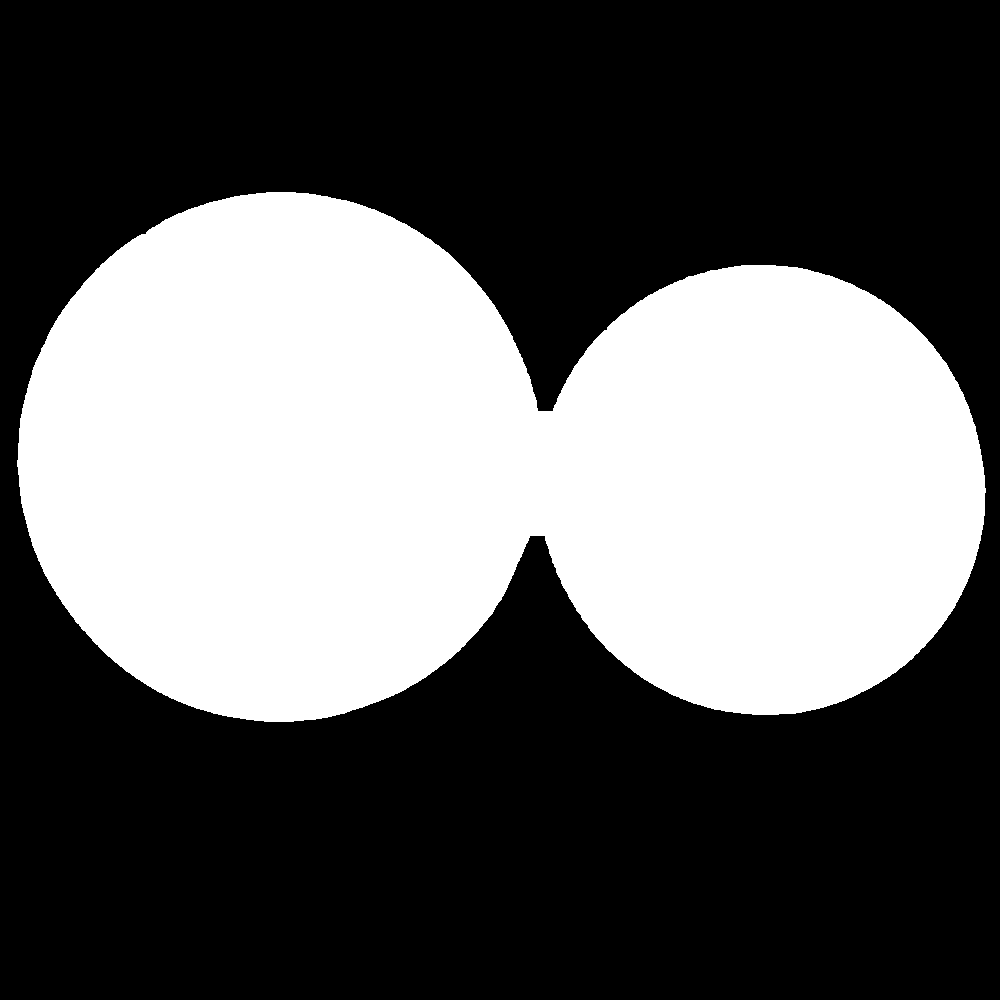

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table


square = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])

def multi_dil(im, num, element=square):
  for i in range(num):
        im = dilation(im, element)
  return im

def multi_ero(im, num, element=square):
  for i in range(num):
        im = erosion(im, element)
  return im

multi_dilated = multi_dil(im_bw_otsu, 7)
area_closed = area_closing(multi_dilated, 3)
multi_eroded = multi_ero(area_closed, 7)
opened = opening(multi_eroded)
cv2_imshow(opened)


Βρέθηκαν στην εικόνα 1 περιοχές




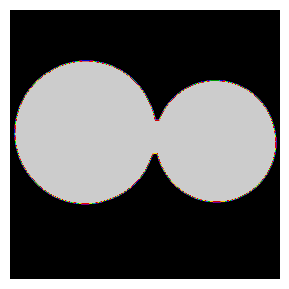

In [67]:
# Find the different elements in image, 4/8 connectivity

label_im = label(opened, connectivity=1)
regions = regionprops(label_im)
print("Βρέθηκαν στην εικόνα", np.size(regions), "περιοχές\n\n")

plt.figure(figsize=(9, 3.5))
plt.imshow(label_im, cmap='nipy_spectral')
plt.axis('off')
plt.show()

In [68]:
regions

### Εξαγωγή χαρακτηριστικών από αντικείμενα σε μονόχρωμες εικόνες

In [69]:
properties = ['area','convex_area','bbox_area', 'extent',
              'mean_intensity', 'solidity', 'eccentricity',
              'orientation']
pd.DataFrame(regionprops_table(label_im, im_gray,
             properties=properties))

area  convex_area  bbox_area    extent  mean_intensity  solidity  \
0  375759.0     426478.0   513570.0  0.731661      104.696798  0.881075   

   eccentricity  orientation  
0      0.886288     1.501899

## Παράδειγμα εύρεσης αντικειμένων σε εικόνα

Βρέθηκαν στην εικόνα 27 περιοχές




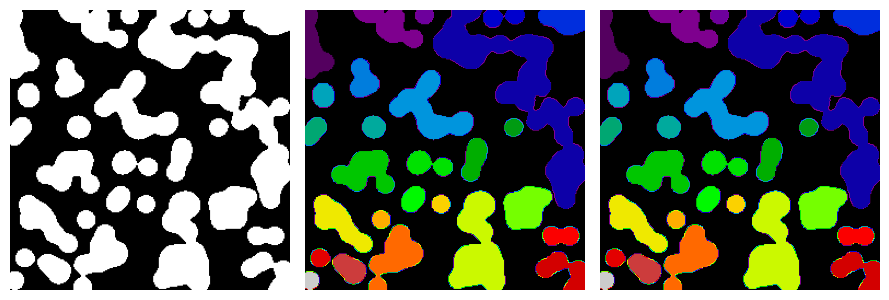

In [76]:
from skimage import measure
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np

n = 12
l = 256
np.random.seed(1)
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = filters.gaussian(im, sigma= l / (4. * n))
blobs = im > 0.7 * im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

regions = regionprops(blobs_labels)
print("Βρέθηκαν στην εικόνα", np.size(regions), "περιοχές\n\n")


plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels, cmap='nipy_spectral')
plt.axis('off')
plt.subplot(133)
plt.imshow(blobs_labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

# Ο αριθμός Euler

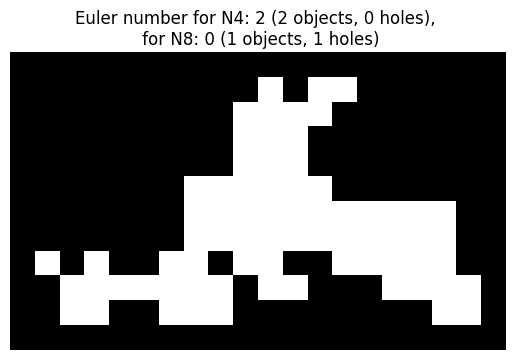

In [77]:
from skimage.measure import euler_number, label
import matplotlib.pyplot as plt
import numpy as np


# Sample image.
SAMPLE = np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
     [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
     [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1],
     [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]
)
SAMPLE = np.pad(SAMPLE, 1, mode='constant')

fig, ax = plt.subplots()
ax.imshow(SAMPLE, cmap=plt.cm.gray)
ax.axis('off')
e4 = euler_number(SAMPLE, connectivity=1)
object_nb_4 = label(SAMPLE, connectivity=1).max()
holes_nb_4 = object_nb_4 - e4
e8 = euler_number(SAMPLE, connectivity=2)
object_nb_8 = label(SAMPLE, connectivity=2).max()
holes_nb_8 = object_nb_8 - e8
ax.set_title(f'Euler number for N4: {e4} ({object_nb_4} objects, {holes_nb_4} '
             f'holes), \n for N8: {e8} ({object_nb_8} objects, '
             f'{holes_nb_8} holes)')
plt.show()

# Υπολογισμός σκελετού αντικειμένου

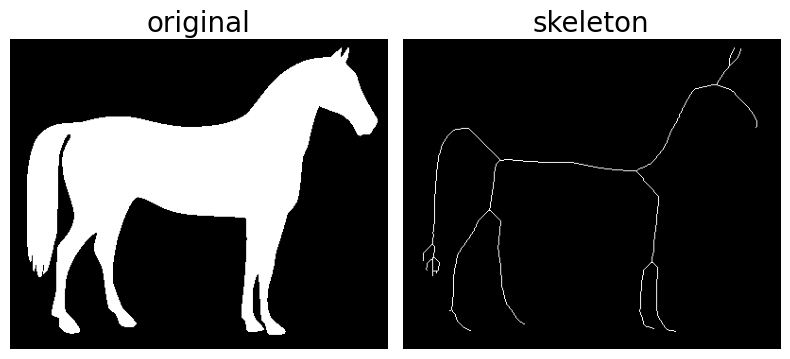

In [78]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

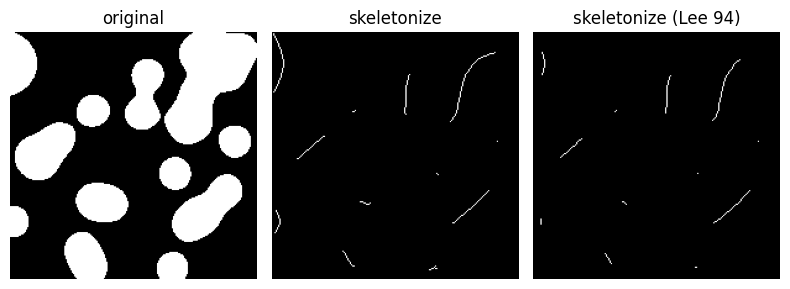

In [79]:
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

blobs = data.binary_blobs(200, blob_size_fraction=.2,volume_fraction=.35)

skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeletonize')
ax[1].axis('off')

ax[2].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[2].set_title('skeletonize (Lee 94)')
ax[2].axis('off')

fig.tight_layout()
plt.show()

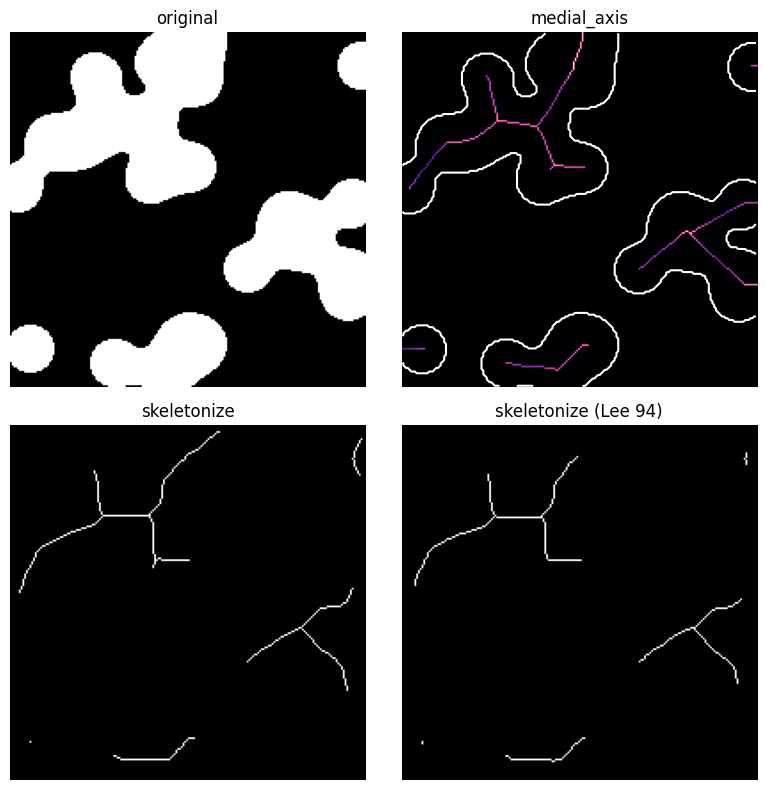

In [80]:
from skimage.morphology import medial_axis, skeletonize

# Generate the data
blobs = data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35)

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma')
ax[1].contour(blobs, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

fig.tight_layout()
plt.show()

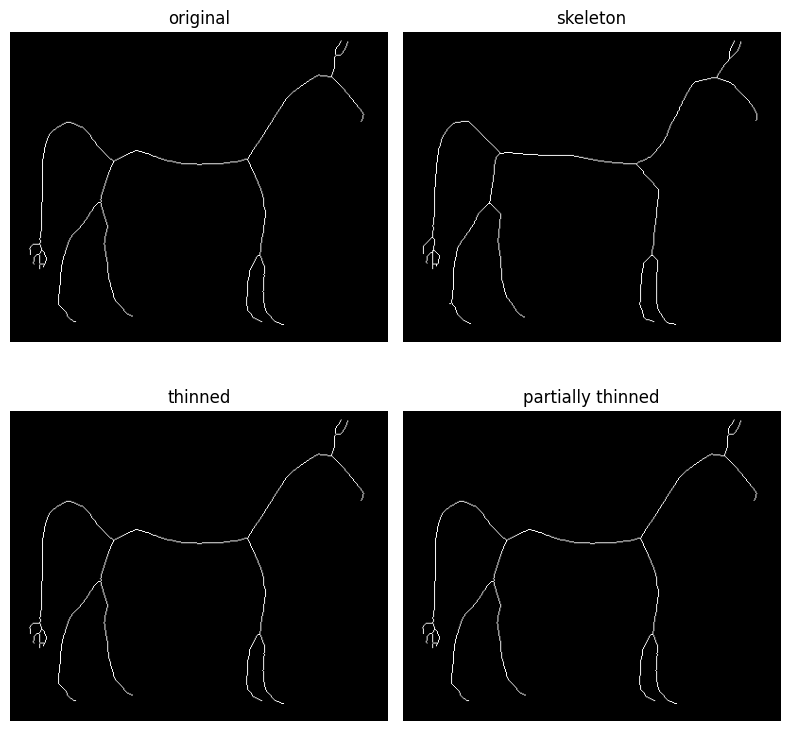

In [81]:
from skimage.morphology import skeletonize, thin

skeleton = skeletonize(image)
thinned = thin(image)
thinned_partial = thin(image, max_num_iter=25)

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeleton')
ax[1].axis('off')

ax[2].imshow(thinned, cmap=plt.cm.gray)
ax[2].set_title('thinned')
ax[2].axis('off')

ax[3].imshow(thinned_partial, cmap=plt.cm.gray)
ax[3].set_title('partially thinned')
ax[3].axis('off')

fig.tight_layout()
plt.show()

# Convex Hull

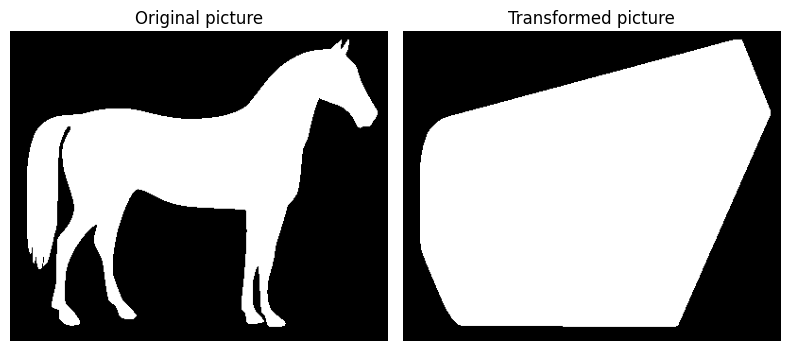

In [82]:
# A convex hull in image processing is like wrapping an elastic band around the outermost points of an object
# it creates the smallest convex shape that contains all the points of the original object
# The convex hull has these key properties:
# It's always convex (no dents or concave regions)
# It contains all points of the original object
# It's the smallest such shape meeting conditions 1 and 2

import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

# The original image is inverted as the object must be white.
image = invert(data.horse())

chull = convex_hull_image(image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

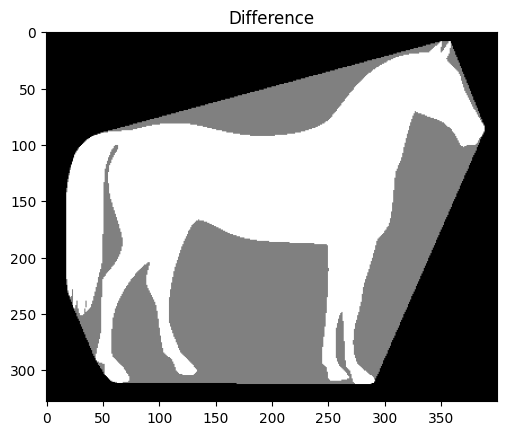

In [83]:
chull_diff = img_as_float(chull.copy())
chull_diff[image] = 2

fig, ax = plt.subplots()
ax.imshow(chull_diff, cmap=plt.cm.gray)
ax.set_title('Difference')
plt.show()

# Παράδειγμα με περιγράμματα #

In [84]:

# Main contour detection and drawing function
def detect_and_draw_contours(image):
    # Make sure image is binary
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a copy for drawing
    drawing = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Find contours
    contours, hierarchy = cv2.findContours(
        image.copy(),  # Use copy as findContours modifies the image
        cv2.RETR_TREE,  # Retrieval mode: gets all contours and reconstructs hierarchy
        cv2.CHAIN_APPROX_SIMPLE  # Compression method: stores only endpoint coordinates
    )

    # Process each contour
    for cnt in contours:
        # Skip very small contours
        if cv2.contourArea(cnt) < 100:
            continue

        # Calculate moments
        M = cv2.moments(cnt)

        # Avoid division by zero
        if M["m00"] != 0:
            # Calculate center coordinates
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            # Approximate the contour to reduce number of points
            epsilon = 0.009 * cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, epsilon, True)

            # Draw the contour
            cv2.drawContours(drawing, [approx], -1, (0, 0, 255), 2)

            # Draw the center point
            cv2.circle(drawing, (cX, cY), 5, (255, 0, 0), -1)

            # Add text showing center coordinates
            cv2.putText(drawing, f"({cX}, {cY})",
                       (cX - 25, cY - 25),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return drawing

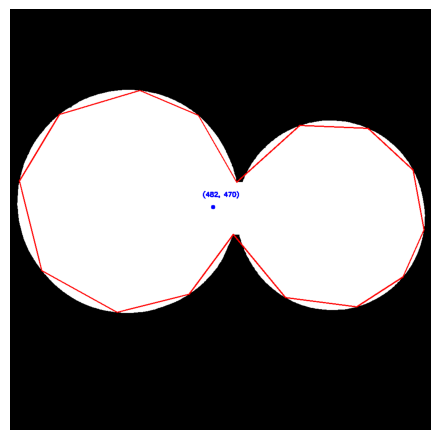

In [85]:
# Process image
result = detect_and_draw_contours(opened)

# Display result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.axis(False)
plt.show()